### Project Decription

<font color='blue'>In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.</font>

### Project Objectives

<font color='blue'>The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this
assignment are as follows:
<br><br>● Understand the basic Image Classification pipeline and the data-driven
approach (train/predict stages)
<br>● Data fetching and understand the train/val/test splits.
<br>● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5
points)
<br>● Print the classification metric report (2.5 points)
<br>● Implement and apply a deep neural network classifier including (feedforward
neural network, RELU activations) (5 points)
<br>● Understand and be able to implement (vectorized) backpropagation (cost
stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
<br>● Implement batch normalization for training the neural network (2.5 points)
<br>● Understand the differences and trade-offs between traditional and NN
classifiers with the help of classification metrics (5 points)</font>

In [1]:
#Importing important modules
#!pip install sklearn
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,Activation

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from tensorflow.keras import backend

import numpy as np
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Data fetching and understand the train/val/test splits.

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/GL AIML/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [4]:
print("training data points: {}".format(len(y_train)))
print("testing data points: {}".format(len(y_test)))

training data points: 42000
testing data points: 18000


In [5]:
y_train[0]

2

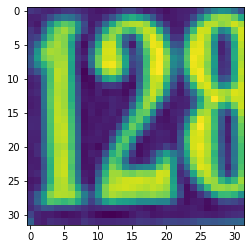

In [6]:
plt.imshow(x_train[0])

In [7]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 32, 32)
x_test shape: (18000, 32, 32)
42000 train samples
18000 test samples


# Splitting to Train and Test Set and Normalization

In [8]:
nsamples_train, nx_train, ny_train = x_train.shape
nsamples_test, nx_test, ny_test = x_test.shape
x_train = x_train.reshape((nsamples_train,nx_train*ny_train))
x_test = x_test.reshape((nsamples_test,nx_test*ny_test))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 1024)
x_test shape: (18000, 1024)
42000 train samples
18000 test samples


# Converting the labels to binary matrix

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Creating and evaluation KNN Model

In [0]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(x_train, y_train)
          # evaluate the model and update the accuracies list
          score = model.score(x_test, y_test)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        
          accuracies.append(score)          

k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%
k=21, accuracy=52.91%
k=23, accuracy=52.98%
k=25, accuracy=52.97%
k=27, accuracy=53.23%
k=29, accuracy=53.16%


# Build the classification NN model

In [10]:
#def build_model(optimizer, learning_rate):
model = Sequential()

model.add(Dense(200, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(100, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(100, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(100, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(30, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10, kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
sgd = optimizers.SGD(lr=0.01, decay = 1e-7, momentum=0.9)

In [0]:
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

# Training and Evaluation of the NN model

In [13]:
model.fit(x_train,y_train,epochs=100,batch_size=500, validation_split=0.2)

# calculate and store test set performance on the model with best validation error
print("Calculating performance on test set...")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 3s 77us/sample - loss: 0.3483 - acc: 0.8973 - val_loss: 0.3252 - val_acc: 0.9000
Epoch 2/100
33600/33600 [==============================] - 1s 33us/sample - loss: 0.3260 - acc: 0.9000 - val_loss: 0.3254 - val_acc: 0.9000
Epoch 3/100
33600/33600 [==============================] - 1s 35us/sample - loss: 0.3242 - acc: 0.9000 - val_loss: 0.3254 - val_acc: 0.9000
Epoch 4/100
33600/33600 [==============================] - 1s 33us/sample - loss: 0.3222 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 5/100
33600/33600 [==============================] - 1s 37us/sample - loss: 0.3173 - acc: 0.9000 - val_loss: 0.3223 - val_acc: 0.9000
Epoch 6/100
33600/33600 [==============================] - 1s 35us/sample - 

## Review model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  205000    
_________________________________________________________________
batch_normalization (BatchNo multiple                  800       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  400       
_________________________________________________________________
activation_1 (Activation)    multiple                  0

# Conclusion

<font color='blue'>As per above, we could see NN works much better than KNN in terms of both Accuracy <b>(KNN-53% / NN-96%)</b> and Performance.
<br>Evaluation using KNN model, takes pretty long time.
<br>NN performance is quite good ( pretty fast)
<br>This proved our theory that KNN takes longer time if the dataset is bigger one, but NN works pretty good when dataset is bigger.</font>